In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Practice

# Question 1

Write a function `make_data(n)` that returns a Series of length `n` where:
- the index is a DatetimeIndex containing dates after `2020-01-01`, with random day intervals greater than 1 day (i.e. the difference between two successive dates is a random number of days greater than 1 day)
- the associated values are the cumulative sum of random numbers generated in the interval `[-1,1]`
- HINT: use [cumsum()](https://pandas.pydata.org/docs/reference/api/pandas.Series.cumsum.html)

In [2]:
def make_data(n):
    # YOUR CODE HERE
    raise NotImplementedError()

## Test question 1

Your code should not raise any error.

In [5]:
s = make_data(100)
assert s.index.min() > pd.to_datetime('2020'), 'Dates should be after 2020'
assert (s.index[1:] - s.index[:-1]).min() > pd.Timedelta(1,'D') , 'The difference should be greater than 1 day'
assert (s.index[1:] - s.index[:-1]).std() != pd.Timedelta(0,'D'), 'The index should not be a regular data range'
assert np.fabs((s - s.shift(1)).values[1:]).max() < 1 , 'Maximum consecutive value difference should be less than 1'

## Solution question 1

In [4]:
def make_data(n):
    d = pd.Series(np.random.randint(10, size=n)+2).cumsum()
    dates = pd.to_datetime('2020') + pd.to_timedelta(d, 'D')
    s = pd.Series(np.random.rand(n)*2-1, index=dates).cumsum()
    return s

# Question 2

Write a function `fill_and_smooth(s, window, std)` that:
- resamples the series in input to fill each missing day with the next available value
- outputs the rolling centred mean over a gaussian weighted window with specified window size and specified standard deviation
- HINT: use [fillna()](https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html) and [rolling()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)

In [6]:
def fill_and_smooth(s, window, std):
    # YOUR CODE HERE
    raise NotImplementedError()

## Test question 2

Your code should not raise any error.

In [9]:
idx = pd.date_range('2011-1-1','2012-1-1', freq='2D')
s = pd.Series([1]*len(idx), index=idx)
a = fill_and_smooth(s, window=3, std=1).values[1:-1]
assert np.all(a == np.ones(len(a))), 'The function fill_and_smooth does not behave as expected'

## Solution question 2

In [8]:
def fill_and_smooth(s, window, std):
    r = s.resample('D').mean().fillna(method = "bfill")
    return r.rolling(window=window, center=True, win_type='gaussian').mean(std=std)

# Question 3

Write a function `get_peaks(s)` that returns the dates corresponding to the peaks in the series (i.e. the local maxima).

Write a function `plot_peaks(s, window, std)` that given a series, internally calls `fill_and_smooth(s, window, std)`, and `get_peaks()` and plots:
1. the original series
2. the smoothed version
3. vertical lines in correspondence to the peaks

Finally execute:
```
s = make_data(200)
plot_peaks(s, window=30, std=7)
```

In [10]:
def get_peaks(s):
    # YOUR CODE HERE
    raise NotImplementedError()
    
def plot_peaks(s, window, std):
    # YOUR CODE HERE
    raise NotImplementedError()

## Test question 3

Your code should not raise any error.

In [14]:
s = pd.Series(-np.power(np.arange(100)-50,2))
assert get_peaks(s).index.values[0] == 50, 'The function get_peaks does not behave as expected'

## Solution question 3

In [12]:
def get_peaks(s):
    local_max = s[(s.shift(1) < s) & (s.shift(-1) < s)]
    return local_max

def plot_peaks(s, window, std):
    s.plot()
    m = fill_and_smooth(s, window=window, std=std)
    m.plot()       
    local_max = get_peaks(m)
    for dat in local_max.index:
        plt.axvline(dat, c='r')

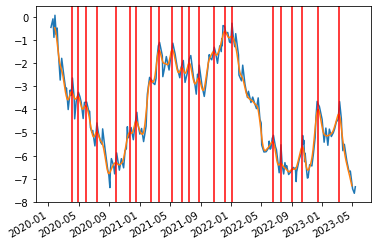

In [13]:
s = make_data(200)
plot_peaks(s, window=30, std=7)